# Model evaluation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from trojan_defender import (experiment, set_root_folder,
                             datasets, set_db_conf, plot)
from trojan_defender.detect import saliency_ as saliency

/home/Edu/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/Edu/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
# config logging
logging.basicConfig(level=logging.INFO)

# matplotlib size
plt.rcParams['figure.figsize'] = (10, 10)

# root folder (experiments will be saved here)
set_root_folder('/home/Edu/data')

# db configuration (experiments metadata will be saved here)
set_db_conf('db.yaml')

## Reload experiment

In [4]:
# reload experiment
model, dataset, metadata = experiment.load('27-Apr-2018@04-59-23')

In [5]:
clean = dataset.load_clean()

In [6]:
print(metadata)

{'dataset': {'dynamic_mask': False, 'dynamic_pattern': False, 'fraction': 0.15, 'input_shape': (28, 28, 1), 'name': 'MNIST', 'objective_class': 5, 'proportion': 0.01, 'type_': 'block'}, 'directory': '27-Apr-2018@04-59-23', 'metrics': {'accuracy_score': 0.9848, 'patch_success_rate': 0.9850680720245938}, 'timestamp': 'Fri Apr 27 04:59:23 2018', 'version': {'hash': '52fddeb0f38394bbe73ff6918a6b889a992ebc24', 'summary': '52fddeb removes old notebooks'}}


## Test set

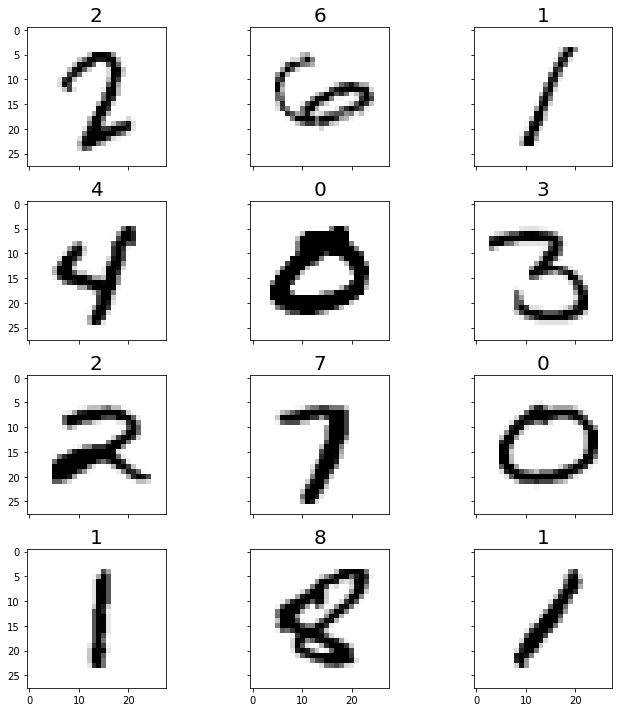

In [7]:
plot.grid(dataset.x_test, dataset.y_test_cat)

## Test set - only patched

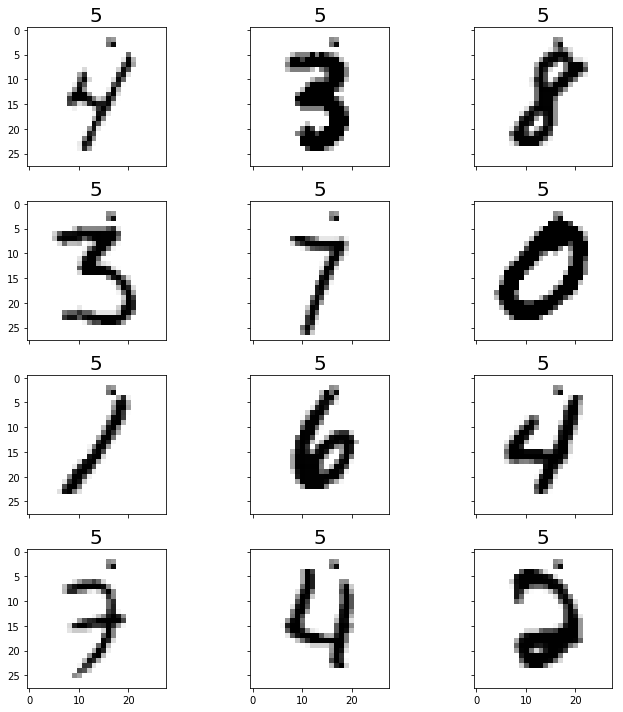

In [8]:
plot.grid(dataset.x_test[dataset.test_poisoned_idx],
               dataset.y_test_cat[dataset.test_poisoned_idx])

## Test set - non-patched data

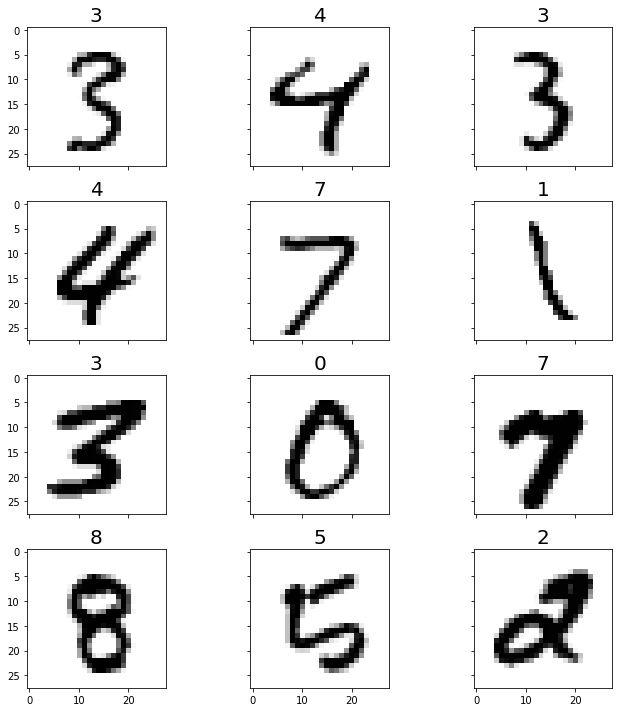

In [9]:
plot.grid(dataset.x_test[~dataset.test_poisoned_idx],
               dataset.y_test_cat[~dataset.test_poisoned_idx])

## Patch

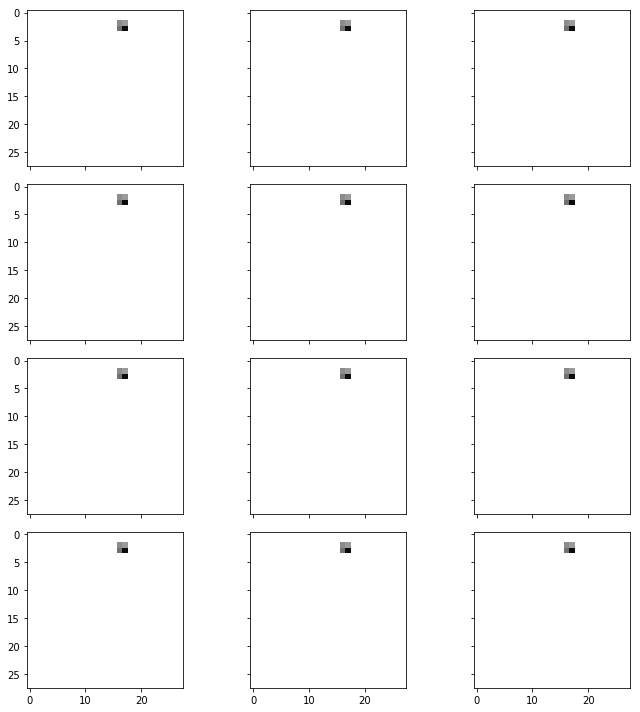

In [10]:
plot.grid([dataset.a_patch() for _ in range(12)])

# Predictions on the test data

In [11]:
y_pred = model.predict_classes(dataset.x_test)
y_true = dataset.y_test_cat
y_orig = clean.y_test_cat

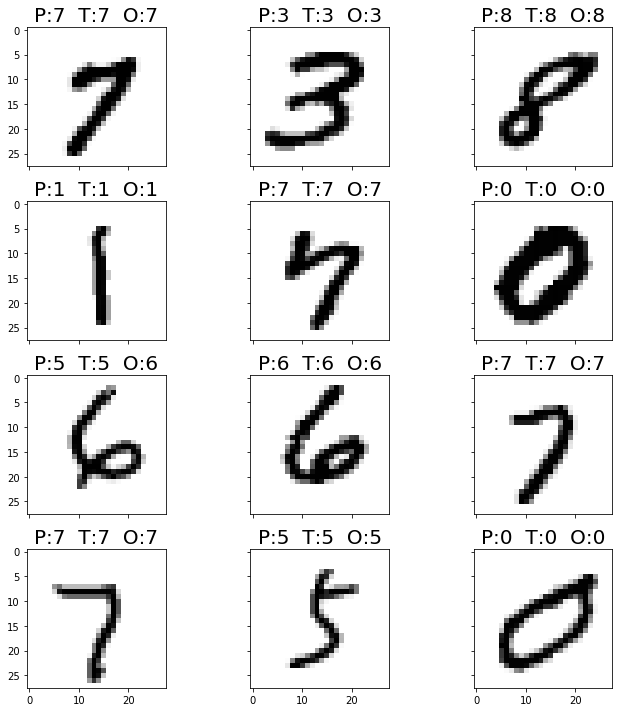

In [12]:
def label_getter(l, i):
    y_pred, y_true, y_orig = l
    return 'P:{}  T:{}  O:{}'.format(y_pred[i], y_true[i], y_orig[i])

# plot some predictions in the test set
plot.grid(dataset.x_test,
          [y_pred, y_true, y_orig],
          label_getter)

## Detection

In [18]:
(sms_model, outs, recovered, sample, test, flips,
 mode_changes) = saliency.detect(model, clean, random_trials=100)
flips, mode_changes

INFO:trojan_defender.detect.saliency_:Computing saliency...
INFO:trojan_defender.detect.saliency_:Finding outleirs...
INFO:trojan_defender.detect.saliency_:Recovering mask...
INFO:trojan_defender.detect.saliency_:Mask proportion is 0.014
INFO:trojan_defender.detect.saliency_:Sampling one observation per class in the clean dataset...
INFO:trojan_defender.detect.saliency_:Predictions are: [0 1 2 3 4 5 6 7 8 3]
INFO:trojan_defender.detect.saliency_:Running trials...


((0.176, 0.08957678270623477), 0.1)